<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Import 'final.py' to expedite and maintain cleanliness
# of this file...
import final as f

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<div style='background-color: orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#wrangleacquire'>Acquire</a></li>
<li><a href='#wrangleprepare'>Prepare</a></li>
<li><a href='#wranglesplit'>Split</a></li>

<a id='wrangleacquire'></a>
<h3><b>Acquire</b></h3>
<li><a href='#wrangle'>Wrangle Top</a></li>

Obtain 'mass_shooters' dataset from excel sheet given by:

<a href='https://www.theviolenceproject.org/'>Non-Profit Organization: 'The Violence Project'</a>

In [2]:
# Using the 'final.py' file...
# Acquire the vanilla 'mass_shooters' dataframe...
vanilla_mass_shooters = f.acquire()
vanilla_mass_shooters.shape

(189, 153)

- Vanilla 'mass_shooters' shape
    - Rows: 189
    - Columns: 153

---

<a id='wrangleprepare'></a>
<h3><b>Prepare</b></h3>
<li><a href='#wrangle'>Wrangle Top</a></li>

In [3]:
# From the 'final.py' file...
# Get the prepared 'mass_shooters' dataset
prepped_mass_shooters = f.prepare()
prepped_mass_shooters.shape

(188, 254)

<a id='preparesummary'></a>
<h3><b><i>
    Summary of Preparation
</i></b></h3>
<li><a href='#prepare'>Prepare Top</a></li>

- <h5><b>Dropped Data</b></h5>

    - 1 Row
        - Missing majority of info
    - 47 columns
        - Useless in scope of predictive value
        - Percent nulls above 20%
        
- <h5><b>Null Handling</b></h5>

    - 44 columns filled with mode
    - 1 column filled with 'None'

- <h5><b>Dtype Cleaning</b></h5>
    
    - Object
        - 4 columns to int
        - 3 columns fixed
    - Float
        - 79 columns to int
        - 3 columns fixed
    - Int
        - Nothing changed
    
- <h5><b>Disseminate Column Information</b></h5>
    
    - 31 columns manually disseminated
        - 137 new columns generated
    
- <h5><b>Aggregate Column Creation</b></h5>    

    - Columns Created: 13

- <h5><b>Text Modifications</b></h5>

    - Column Name Changes
        - Removals: 5
            - '\xa0'
            - '('
            - ')'
            - '/'
            - ':'
        - Replacements: 2
            - whitespace ==> '_'
            - '#' ==> 'id'
        - Case Change: 1
            - ALL LOWERCASE

- <h5><b>Target Column Creation</b></h5>

    - Target value is predicting the mass shooter's volatility as accurately as possible based on the number of casualties
        - 'High Volatility'
            - Casualties > 10
        - 'Low Volatility'
            - Casualties <= 10

- <h5><b>Final Dataframe</b></h5>

    - Rows: 188
    - Columns: 254

---

<a id='wranglesplit'></a>
<h3><b>Split</b></h3>
<li><a href='#wrangle'>Wrangle Top</a></li>

In [4]:
# From the 'final.py' file...
# Split the prepared 'mass_shooters' dataframe
train, validate, test = f.wrangle()
train.shape, validate.shape, test.shape

((131, 254), (38, 254), (19, 254))

- Train
    - 70%
- Validate
    - 20%
- Test
    - 10%

<div style='background-color: orange'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align: center'>
        Exploration
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#exploreorientation'>Orientation</a></li>
<li><a href='#explorekey'>Key Visuals</a></li>
<li><a href='#exploresummary'>Summary</a></li>

<a id='exploreorientation'></a>
<h3><b>Orientation</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

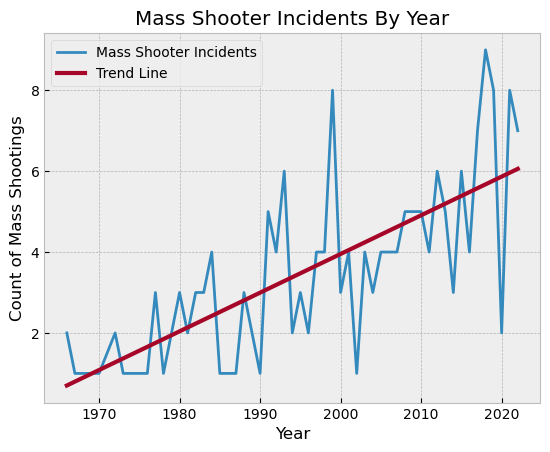

In [5]:
# From the 'final.py' file...
# Get the total mass shootings by year
f.visual1()

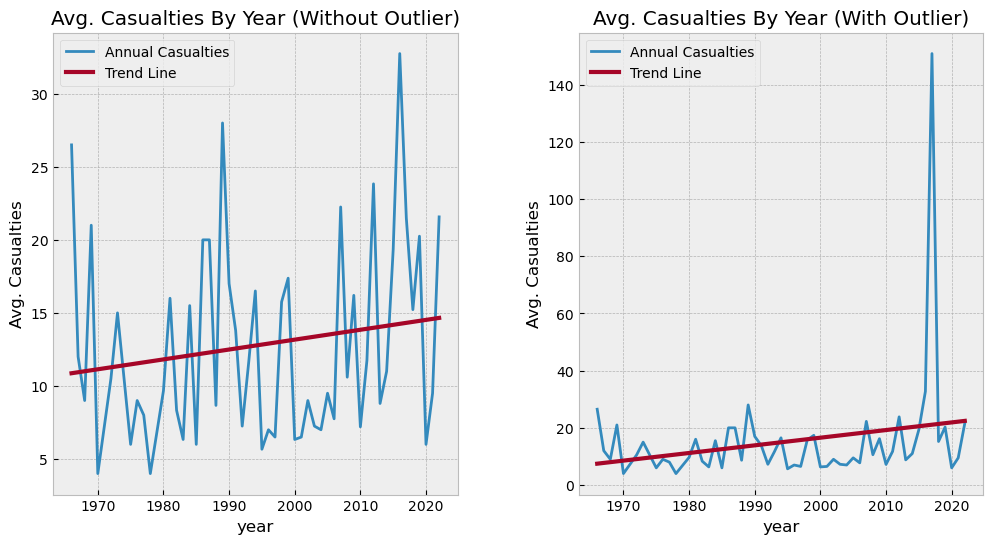

In [6]:
# From the 'final.py' file...
# Get the total casualties by year with and without the outlier
f.visual2()

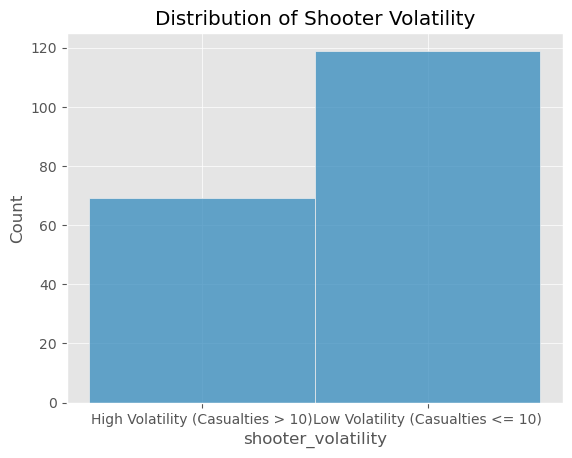

In [7]:
# From the 'final.py' file...
# Get the distribution of the target value 'shooter_volatility'
# where 'low_volatility' is 10 or less casualties
# and 'high_volatility' is more than 10 casualties
f.visual3()

---

<a id='explorekey'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>Question 1:</b> Does the mass shooter's criminal history (Specifcally the 32 kinds of felonies within the dataset) affect the amount of casualties?

<b>H$_0$:</b> The amount of different felonies the mass shooter has committed <b><i>DOES NOT</i></b> affect the amount of casualties.

<b>H$_a$:</b> The amount of different felonies the mass shooter has committed <b><i>DOES</i></b> affect the amount of casualties.

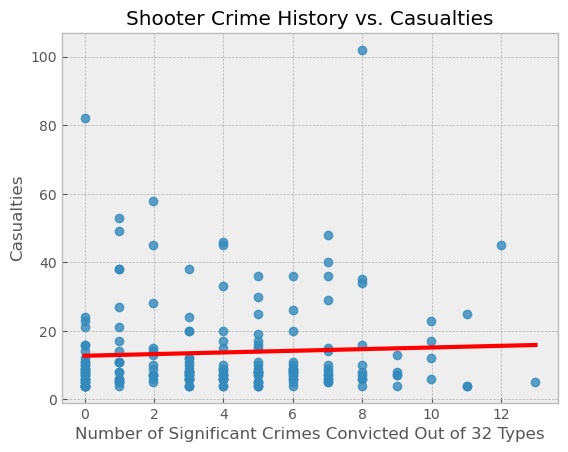

In [8]:
# From the 'final.py' file...
# Get the regplot of unique felony crimes the shooter committed
# vs. the amount of casualties produced by the shooter
f.visual4()

In [9]:
# From the 'final.py' file...
# Test the statistical significance of unique felony crimes the 
# shooter committed vs. the amount of casualties produced by 
# the shooter
f.stat1()

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -34.4356
P-Value: 0.0000


<b>Q1 Answer:</b> Reject the null hypothesis...

The amount of different felonies the mass shooter has committed <b><i>DOES</i></b> affect the amount of casualties.

---

<b>Question 2:</b> Does the amount of significant traumatic events that the mass shooter experienced (Specifcally the 20 kinds of events within the dataset) affect the amount of casualties?

<b>H$_0$:</b> The amount of traumatic events the mass shooter has experienced <b><i>DOES NOT</i></b> affect the amount of casualties.

<b>H$_a$:</b> The amount of traumatic events the mass shooter has experienced <b><i>DOES</i></b> affect the amount of casualties.

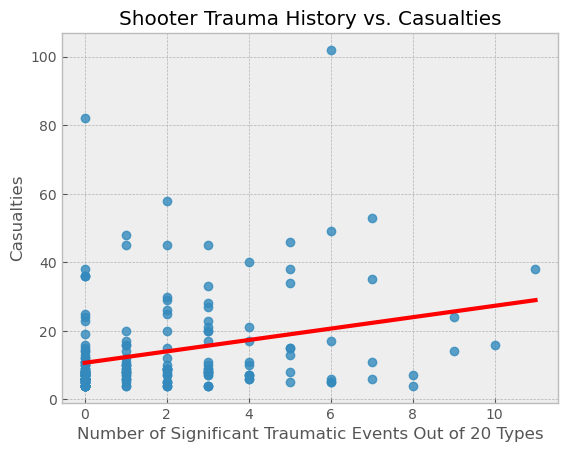

In [10]:
# From the 'final.py' file...
# Get the regplot of significant traumatic events the shooter experienced
# vs. the amount of casualties produced by the shooter
f.visual5()

In [11]:
# From the 'final.py' file...
# Test the statistical significance of significant traumatic events 
# the shooter experienced vs. the amount of casualties produced 
# by the shooter
f.stat2()

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -14.0131
P-Value: 0.0000


<b>Q2 Answer:</b> Reject the null hypothesis...

The amount of traumatic events the mass shooter has experienced <b><i>DOES</i></b> affect the amount of casualties.

---

<b>Question 3:</b> Does the amount of abnormalities that the mass shooter exhibits (Specifcally the 109 kinds of abnormalities within the dataset) affect the amount of casualties?

<b>H$_0$:</b> The amount of abnormalities the mass shooter exhibits <b><i>DOES NOT</i></b> affect the amount of casualties.

<b>H$_a$:</b> The amount of abnormalities the mass shooter exhibits <b><i>DOES</i></b> affect the amount of casualties.

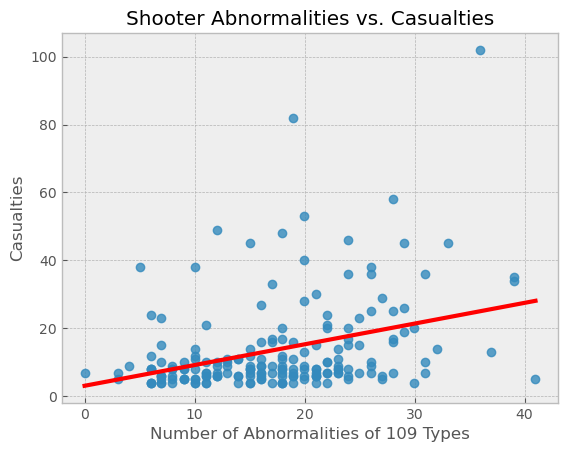

In [12]:
# From the 'final.py' file...
# Get the regplot of abnormalities the shooter exhibits
# vs. the amount of casualties produced by the shooter
f.visual6()

In [13]:
# From the 'final.py' file...
# Test the statistical significance of abnormalities the shooter 
# exhibits vs. the amount of casualties produced by the shooter
f.stat3()

========== REJECT NULL HYPOTHESIS! ==========
Statistic: -164.6471
P-Value: 0.0000


<b>Q3 Answer:</b> Reject the null hypothesis...

The amount of abnormalities the mass shooter exhibits <b><i>DOES</i></b> affect the amount of casualties.

---

<a id='exploresummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

- Orientation
    - From 1966 - 2022, mass shooting events have increased as well as the total casualties
- Key Visuals
    - Leads to increase in casualties:
        - More unique felon crimes committed
        - More unique traumatic events experienced
        - More abnormalities the shooter exhibits

<div style='background-color: orange'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [14]:
# From the 'final.py' file...
# Obtain the baseline score of 'shooter_volatility' via accuracy and recall
f.baseline()

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.0,0.0,0.0


---

<a id='modeltable'></a>
<h3><b>Models Table</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [15]:
# From the 'final.py' file...
# Get the scores of the baseline and a sample of models created
f.models()

,model_name,model_type,model_descriptor,accuracy_train,accuracy_val,accuracy_diff,recall_variable,recall_train,recall_val,recall_diff
0,Baseline,Baseline,Mode = Low Volatility,0.634,0.632,-0.002,High Volatility,0.000,0.000,0.000
1,DTC1,Decision Tree Classifier,zero_high,0.710,0.632,-0.078,High Volatility,0.312,0.286,-0.026
2,DTC2,Decision Tree Classifier,zero_low,0.725,0.605,-0.120,High Volatility,0.792,0.500,-0.292
3,DTC3,Decision Tree Classifier,one_high,0.763,0.684,-0.079,High Volatility,0.479,0.286,-0.193
4,DTC4,Decision Tree Classifier,one_low,0.725,0.658,-0.067,High Volatility,0.562,0.643,0.081
5,DTC5,Decision Tree Classifier,zero_all,0.802,0.763,-0.039,High Volatility,0.521,0.571,0.050
6,DTC6,Decision Tree Classifier,one_all,0.763,0.684,-0.079,High Volatility,0.688,0.714,0.026
7,DTC7,Decision Tree Classifier,high_only,0.771,0.658,-0.113,High Volatility,0.500,0.357,-0.143
8,DTC8,Decision Tree Classifier,low_only,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274
9,DTC9,Decision Tree Classifier,all_binary,0.733,0.579,-0.154,High Volatility,0.917,0.643,-0.274


<b><i>Accuracy:</i></b>
For simply seeing if the model can predict both values as accurately as possible...

<b><i>Recall (High Volatility):</i></b>
For seeing how well the model predicts whether or not a shooter is highly volatile...

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [16]:
# From the 'final.py' file...
# Get the scores of the baseline and the best model
f.models_best()

,model_name,model_type,model_descriptor,accuracy,recall_pos_label,recall
0,Baseline,Baseline,"mode == ""Low Volatility""",0.632,High Volatility,0.000
1,DTC_aggregates2,Decision Tree Classifier,"[agg_stress, agg_trauma, agg_health]",0.579,High Volatility,0.714
2,DTC_aggregates3,Decision Tree Classifier,"[agg_stress, agg_trauma]",0.737,High Volatility,0.571


- <b><i>Accuracy</i></b>
    - DTC_aggregates3 (73.7%)
        - aggregate stress and trauma
        - +10.5% from baseline
- <b><i>Recall</i></b>
    - DTC_aggregates2 (71.4%)
        - aggregate stress, trauma, health
        - +71.4% from baseline

<div style='background-color: orange'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

Since 1966, mass shooting events as well as the average casualties have been increasing.

It does appear that as an individual deviates further from normal life experiences, psyche, and has less inhibition to harm another, then the individual is more likely to become a highly volatile mass shooter. 

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

If you want the most accurate predictions overall, there's a 10.5% increase from the baseline at 73.7%...

If you want the most accurate predictions for highly volatile shooters, there's a 71.4% increase from the baselinea t 71.4%...

Implementing this model can give key decision makers in a mass shooting event a stronger drive to allocate more resources and/or quicker actions to a mass shooting event should the shooter be identified as highly volatile in order to subdue the threat.  However, due to the expansive information this model requires, I'd imagine this would need to be autho

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

1. (CURRENT) Predict volatility of mass shooters
    - Fully exhaust all exploration routes from this dataset (Only 1 excel sheet out of 8 sheets)
        - Attempt to identify stronger features
        - Attempt to improve model accuracy/recall
        - Create regression models to better predict casualties rather than binning them
   - Repeat this process for the 'true' full-dataset (All 8 excel sheets)
        - Attempt to improve findings from #1
   - Ensure the best possible model is created from this 'true' full-dataset
        - All possible exploration/modeling exhausted
2. (FUTURE) Predict shooter to mass shooter
    - Identify patterns of shooters
    - Create model for shooters
    - Attempt to use both shooter and mass shooter model to predict if someone will be a mass shooter as well as their volatility from a population of shooters
3. (FUTURE) Predict criminal to shooter
    - Identify patterns of criminals
    - Create model for criminals
    - Attempt to use criminal, shooter, and mass shooter models to predict if someone will be a mass shooter as well as their volatility from a population of criminals
4. (FUTURE) Predict civilian to criminal
    - Identify patterns of civilians
    - Create model for civilians
    - Attempt to use civilian, criminal, shooter, and mass shooter models to predict if someone will be a mmass shooter as well as their volatility from a population of civilians
5. (FUTURE) See similarities between countries???